In [37]:
import pandas as pd
from fun import *
from common import generate_mapper
from dotenv import load_dotenv
import os
import json

In [50]:
def recover_all_files(path: str):
    files_content = []

    for filename in os.listdir(path):
        with open(f"{path}/{filename}") as infile:
            file_content = json.load(infile)
            files_content += file_content
    return pd.DataFrame(files_content).sort_values(by="id").reset_index(drop=True)

In [51]:
df_gemma = recover_all_files("../data/gemma/")
df_gemma

,sentence,score,id
0,"Original sentence: ""Police said in a statement...",85,0
1,"Original sentence: ""Trump will likely veto the...",85,1
2,"Original sentence: ""The man arrived at work ab...",95,2
3,"Original sentence: ""Are hopes for a nuclear-fr...",95,3
4,"Original sentence: ""The California attorney ge...",85,4
...,...,...,...
2395,"Original sentence: ""Wayalela amagosa ukuba aye...",85,2395
2396,"Original sentence: ""Ulimo lokuphila lulula, ol...",85,2396
2397,"Original sentence: ""UMlawuli wezoTshutshiso lo...",85,2397
2398,"Original sentence: ""Ukuphumla phezu kweentaba ...",85,2398


In [52]:
df = pd.read_csv("../data/translations.csv")
df.head()

,lp,src,mt,ref,score,raw,annotators,domain,year,l1,l2
0,en-zh,Police said in a statement at the time that th...,警方在当时的一份声明中表示，他们决定以“沉重的心情”结束对 Jacsun 的搜索，但指出他们...,警方在当时的一份声明中表示，他们在决定结束对杰森的搜寻时，是怀着“沉重的心情”的，并指出他们...,0.238989,80.500000,4,news,2020,en,zh
1,en-zh,"Trump will likely veto the resolution, the six...",特 朗 普 可 能 会 否 决 该 决 议 ， 这 是 他 第 六 次 以 总 统 身 份 ...,特朗普很可能行使总统否决权，这将是他成为总统以来第6次否决国会立法。他早在三月已动用否决权，...,0.487842,81.166667,6,news,2020,en,zh
2,en-zh,The man arrived at work about 9.30am after fai...,该名男子未能回复同事的几条短信和电话，于上午9.30左右上班。,该男子大约在上午 9:30 到达工作单位，在此之前，他未能回复同事发来的几条信息和打来的电话。,0.469850,80.500000,4,news,2020,en,zh
3,en-zh,Are hopes for a nuclear-free world realistic?,对一个无核世界的希望是现实的吗 ？,实现无核化世界的希望是否现实？,0.626218,81.000000,4,news,2020,en,zh
4,en-zh,The California attorney general's office in Ma...,"3月,加利福尼亚总检察长办公室在经过近一年的调查后拒绝提出州刑事指控,当时,总检察长Xavi...",3 月，加州总检察长办公室在完成了近一年的案件调查后，拒绝对两名警察提起加州刑事起诉。总检察...,-0.207602,59.000000,4,news,2020,en,zh


In [53]:
mistakes_mapper = {
    "85": "85",
    "95": "95",
    "75": "75",
    "0": "0",
    "70": "70",
    "60": "60",
    "65": "65",
    "30/100": "30",
    "10": "10",
    "30": "30",
    "20": "20",
    "60/100": "60",
    "90": "90",
    "20/100": "20",
    '15/100\n\n**Issues:**\n- Accuracy: Uses incorrect terminology ("olympiamitali" instead of "medal"), lacks context ("kansa saa vapaapäivän" doesn\'t translate to "people get holiday").\n- Fluency: Word choice and sentence structure are unnatural in English.\n- Coherence: The translation lacks coherence and fails to convey the original meaning.': "15",
    "10/100": "10",
    "15/100": "15",
    "40": "40",
    "**85/100**": "85",
    "15": "15",
    "**95**": "95",
    "0-20": None,
    "20/100\n\nThe translation lacks accuracy in vocabulary and grammar, and coherence due to awkward phrasing.": "20",
    "0\n\nThe translation is inaccurate and lacks coherence.": "0",
}

In [54]:
df_gemma["score"] = df_gemma["score"].map(mistakes_mapper)

In [55]:
df["gemma_score"] = df_gemma["score"].astype(float)

In [108]:
data = df[["lp", "raw", "gemma_score"]]
data

,lp,raw,gemma_score
0,en-zh,80.500000,85.0
1,en-zh,81.166667,85.0
2,en-zh,80.500000,95.0
3,en-zh,81.000000,95.0
4,en-zh,59.000000,85.0
...,...,...,...
2395,xh-zu,100.000000,85.0
2396,xh-zu,90.000000,85.0
2397,xh-zu,100.000000,85.0
2398,xh-zu,50.000000,85.0


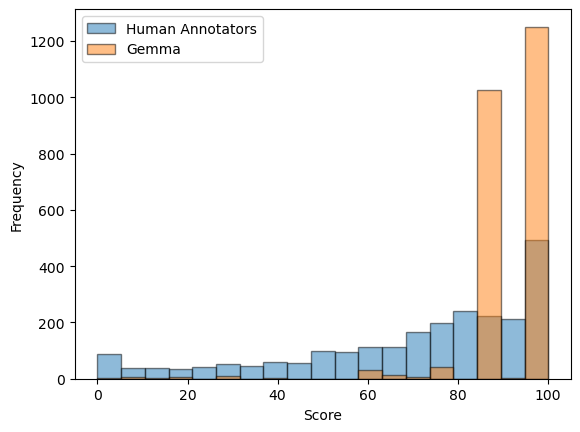

In [116]:
import numpy as np

bins = np.linspace(0, 100, 20)

plt.hist(data["raw"], bins, alpha=0.5, label='Human Annotators', edgecolor='black')
plt.hist(data["gemma_score"], bins, alpha=0.5, label='Gemma', edgecolor='black')

plt.xlabel('Score')
plt.ylabel('Frequency')

plt.legend(loc='upper left')
plt.show()

In [103]:
n_bars = 20
size = 100 / n_bars

data["raw_d"] = (data["raw"] // size) * size
data["gemma_d"] = (data["gemma_score"] // size) * size

data["raw_d"][data["raw_d"]==100] = 95.
data["raw_d"][data["gemma_d"]==100] = 95.

data

C:\Users\ruben\AppData\Local\Temp\ipykernel_41012\1363731974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["raw_d"] = (data["raw"] // size) * size
C:\Users\ruben\AppData\Local\Temp\ipykernel_41012\1363731974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gemma_d"] = (data["gemma_score"] // size) * size
C:\Users\ruben\AppData\Local\Temp\ipykernel_41012\1363731974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

,lp,raw,gemma_score,raw_d,gemma_d
0,en-zh,80.500000,85.0,80.0,85.0
1,en-zh,81.166667,85.0,80.0,85.0
2,en-zh,80.500000,95.0,80.0,95.0
3,en-zh,81.000000,95.0,80.0,95.0
4,en-zh,59.000000,85.0,55.0,85.0
...,...,...,...,...,...
2395,xh-zu,100.000000,85.0,95.0,85.0
2396,xh-zu,90.000000,85.0,90.0,85.0
2397,xh-zu,100.000000,85.0,95.0,85.0
2398,xh-zu,50.000000,85.0,50.0,85.0


In [104]:
raw = data.groupby("raw_d").agg("count")["lp"]
gemma = data.groupby("gemma_d").agg("count")["lp"]

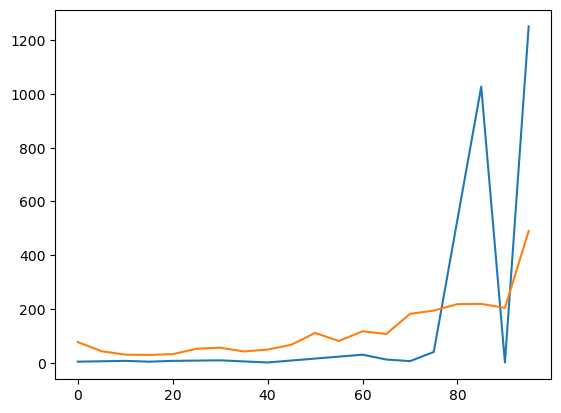

In [105]:
import matplotlib.pyplot as plt

x = gemma.index
y = gemma.to_list()

x_ = raw.index
y_ = raw.to_list()

plt.plot(x, y)
plt.plot(x_, y_)

In [106]:
bar = pd.concat([raw, gemma], axis=1).fillna(0)
bar.columns = ['raw', 'gemma']
bar

,raw,gemma
0.0,77,4.0
5.0,43,0.0
10.0,30,7.0
15.0,29,4.0
20.0,32,7.0
25.0,52,0.0
30.0,56,9.0
35.0,42,0.0
40.0,49,1.0
45.0,67,0.0


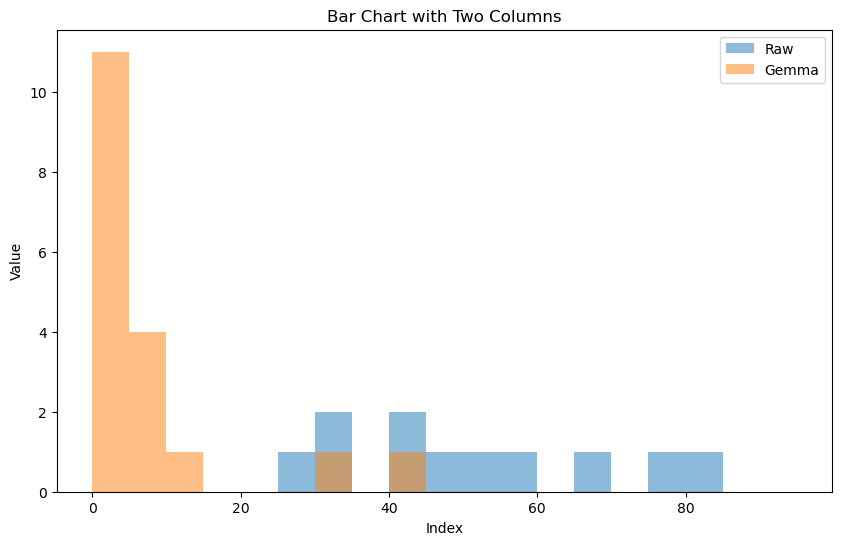

In [107]:
plt.figure(figsize=(10, 6))

plt.hist(bar['raw'], bar.index, alpha=0.5, label='Raw')
plt.hist(bar['gemma'], bar.index, alpha=0.5, label='Gemma')

plt.xlabel('Index')
plt.ylabel('Value')

plt.title('Bar Chart with Two Columns')
plt.legend()
plt.show()

[0.0016666666666666668,
 0.002916666666666667,
 0.0016666666666666668,
 0.002916666666666667,
 0.00375,
 0.0004166666666666667,
 0.0125,
 0.005,
 0.0025,
 0.016666666666666666,
 0.42791666666666667,
 0.0004166666666666667,
 0.52125]

In [67]:
data

,lp,raw,gemma_score,raw_d,gemma_d
0,en-zh,80.500000,85.0,82.5,87.5
1,en-zh,81.166667,85.0,82.5,87.5
2,en-zh,80.500000,95.0,82.5,97.5
3,en-zh,81.000000,95.0,82.5,97.5
4,en-zh,59.000000,85.0,57.5,87.5
...,...,...,...,...,...
2395,xh-zu,100.000000,85.0,97.5,87.5
2396,xh-zu,90.000000,85.0,92.5,87.5
2397,xh-zu,100.000000,85.0,97.5,87.5
2398,xh-zu,50.000000,85.0,52.5,87.5
